<a href="https://colab.research.google.com/github/jkmolina30/Data_Science-Challenge_Alura_Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [62]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda2.head()

# Unimos todos los archivos en uno solo
dfppal = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
dfppal.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [37]:
# Ingreso total por tienda
ingreso_tienda_1 = tienda['Precio'].sum()
ingreso_tienda_2 = tienda2['Precio'].sum()
ingreso_tienda_3 = tienda3['Precio'].sum()
ingreso_tienda_4 = tienda4['Precio'].sum()

ingreso_totales = ingreso_tienda_1 + ingreso_tienda_2 + ingreso_tienda_3 + ingreso_tienda_4

# Mostramos los resultados
print(f'Ingreso total Tienda 1: ${ingreso_tienda_1:,.0f}')
print(f'Ingreso total Tienda 2: ${ingreso_tienda_2:,.0f}')
print(f'Ingreso total Tienda 3: ${ingreso_tienda_3:,.0f}')
print(f'Ingreso total Tienda 4: ${ingreso_tienda_4:,.0f}')
print("")
print(f'Ingresos totales: ${ingreso_totales}')


Ingreso total Tienda 1: $1,150,880,400
Ingreso total Tienda 2: $1,116,343,500
Ingreso total Tienda 3: $1,098,019,600
Ingreso total Tienda 4: $1,038,375,700

Ingresos totales: $4403619200.0


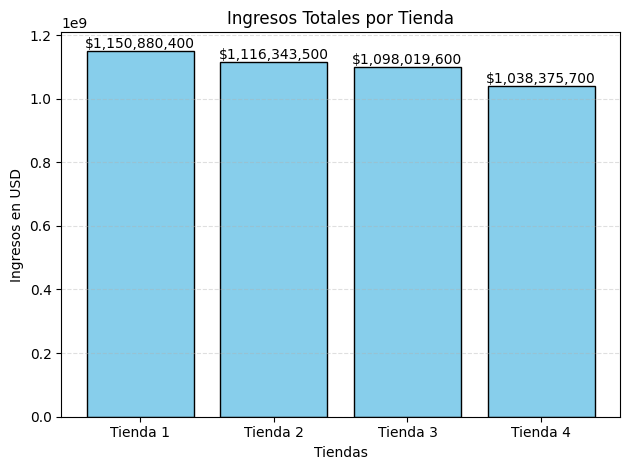

In [42]:
import matplotlib.pyplot as plt

lista_tienda = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
lista_facturacion = [ingreso_tienda_1, ingreso_tienda_2, ingreso_tienda_3, ingreso_tienda_4]

#plt.bar(x= lista_tienda, height=lista_facturacion)
plt.bar(lista_tienda, lista_facturacion, color='skyblue', edgecolor='black')
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Ingresos en USD')
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Mostrar valores encima de cada barra
for i, valor in enumerate(lista_facturacion):
    plt.text(i, valor, f'${valor:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [52]:
# Agrupar por 'Tienda' y 'Categoría del Producto' y contar las ventas
productos_por_categoria = dfppal.groupby(['Lugar de Compra', 'Categoría del Producto']).size().reset_index(name='Cantidad Vendida')

# Mostramos los primeros resultados para verificar
print(productos_por_categoria.head())

# Ordenar las categorías por cantidad de ventas (de mayor a menor) dentro de cada tienda
productos_por_categoria_sorted = productos_por_categoria.sort_values(by=['Lugar de Compra', 'Cantidad Vendida'], ascending=[True, False])

# Mostramos el DataFrame ordenado
print("")
print("Tabla Ordenada")
print(productos_por_categoria_sorted.head())

  Lugar de Compra   Categoría del Producto  Cantidad Vendida
0         Armenia  Artículos para el hogar                 3
1         Armenia     Deportes y diversión                 1
2         Armenia        Electrodomésticos                 2
3         Armenia             Electrónicos                 7
4         Armenia   Instrumentos musicales                 1

Tabla Ordenada
  Lugar de Compra   Categoría del Producto  Cantidad Vendida
3         Armenia             Electrónicos                 7
5         Armenia                 Juguetes                 7
7         Armenia                  Muebles                 5
0         Armenia  Artículos para el hogar                 3
2         Armenia        Electrodomésticos                 2


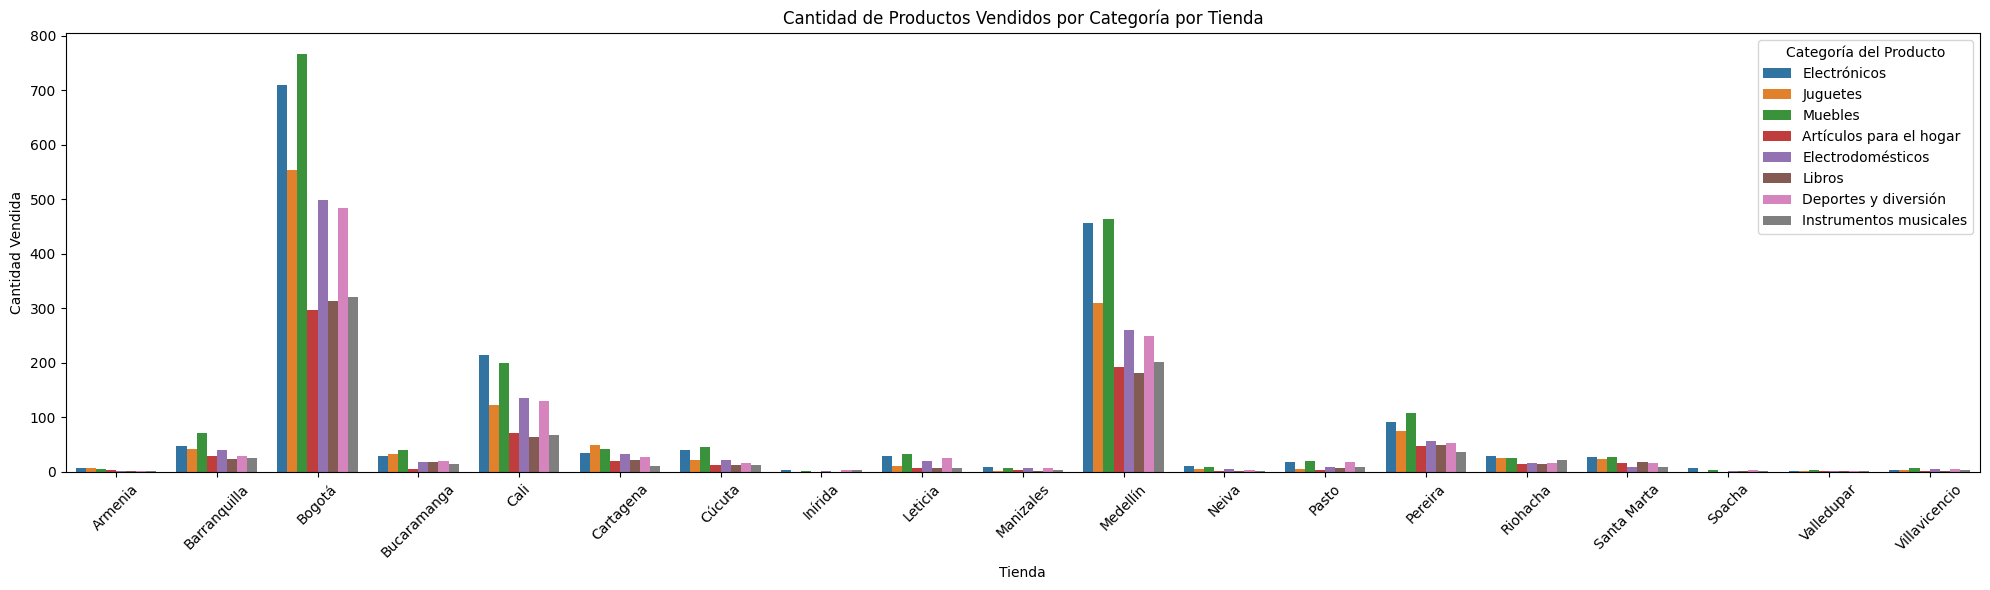

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
# Crear un gráfico de barras apiladas por categoría y tienda
sns.barplot(x='Lugar de Compra', y='Cantidad Vendida', hue='Categoría del Producto', data=productos_por_categoria_sorted)

plt.title('Cantidad de Productos Vendidos por Categoría por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)
plt.legend(title='Categoría del Producto')

plt.tight_layout()
plt.show()


  Lugar de Compra   Categoría del Producto  Cantidad Vendida
0         Armenia  Artículos para el hogar                 1
1         Armenia     Deportes y diversión                 1
2         Armenia        Electrodomésticos                 2
3         Armenia             Electrónicos                 2
4         Armenia                 Juguetes                 3

Tabla Ordenada
  Lugar de Compra   Categoría del Producto  Cantidad Vendida
6         Armenia                  Muebles                 4
4         Armenia                 Juguetes                 3
2         Armenia        Electrodomésticos                 2
3         Armenia             Electrónicos                 2
0         Armenia  Artículos para el hogar                 1


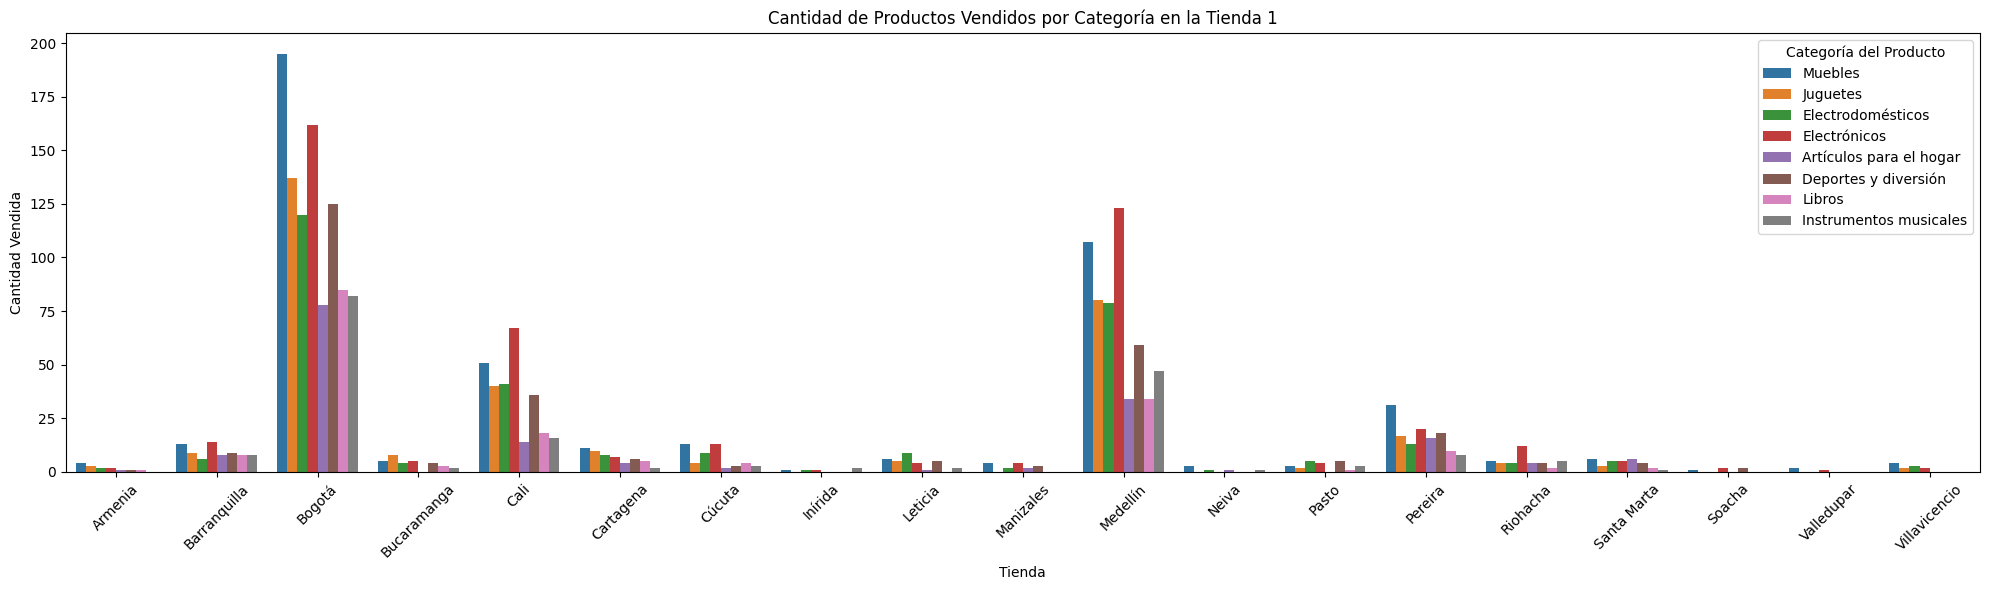

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# VENTAS POR CATEGORIA TIENDA 1
# Agrupar por 'Tienda' y 'Categoría del Producto' y contar las ventas
productos_por_categoria_tienda1 = tienda.groupby(['Lugar de Compra', 'Categoría del Producto']).size().reset_index(name='Cantidad Vendida')

# Mostramos los primeros resultados para verificar
print(productos_por_categoria_tienda1.head())

# Ordenar las categorías por cantidad de ventas (de mayor a menor) dentro de cada tienda
productos_por_categoria_sorted1 = productos_por_categoria_tienda1.sort_values(by=['Lugar de Compra', 'Cantidad Vendida'], ascending=[True, False])

# Mostramos el DataFrame ordenado
print("")
print("Tabla Ordenada")
print(productos_por_categoria_sorted1.head())


plt.figure(figsize=(20, 6))
# Crear un gráfico de barras apiladas por categoría y tienda
sns.barplot(x='Lugar de Compra', y='Cantidad Vendida', hue='Categoría del Producto', data=productos_por_categoria_sorted1)

plt.title('Cantidad de Productos Vendidos por Categoría en la Tienda 1')
plt.xlabel('Tienda')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)
plt.legend(title='Categoría del Producto')

plt.tight_layout()
plt.show()

  Lugar de Compra   Categoría del Producto  Cantidad Vendida
0         Armenia             Electrónicos                 2
1         Armenia                 Juguetes                 1
2         Armenia                  Muebles                 1
3    Barranquilla  Artículos para el hogar                 9
4    Barranquilla     Deportes y diversión                 6

Tabla Ordenada
   Lugar de Compra Categoría del Producto  Cantidad Vendida
0          Armenia           Electrónicos                 2
1          Armenia               Juguetes                 1
2          Armenia                Muebles                 1
10    Barranquilla                Muebles                25
8     Barranquilla               Juguetes                13


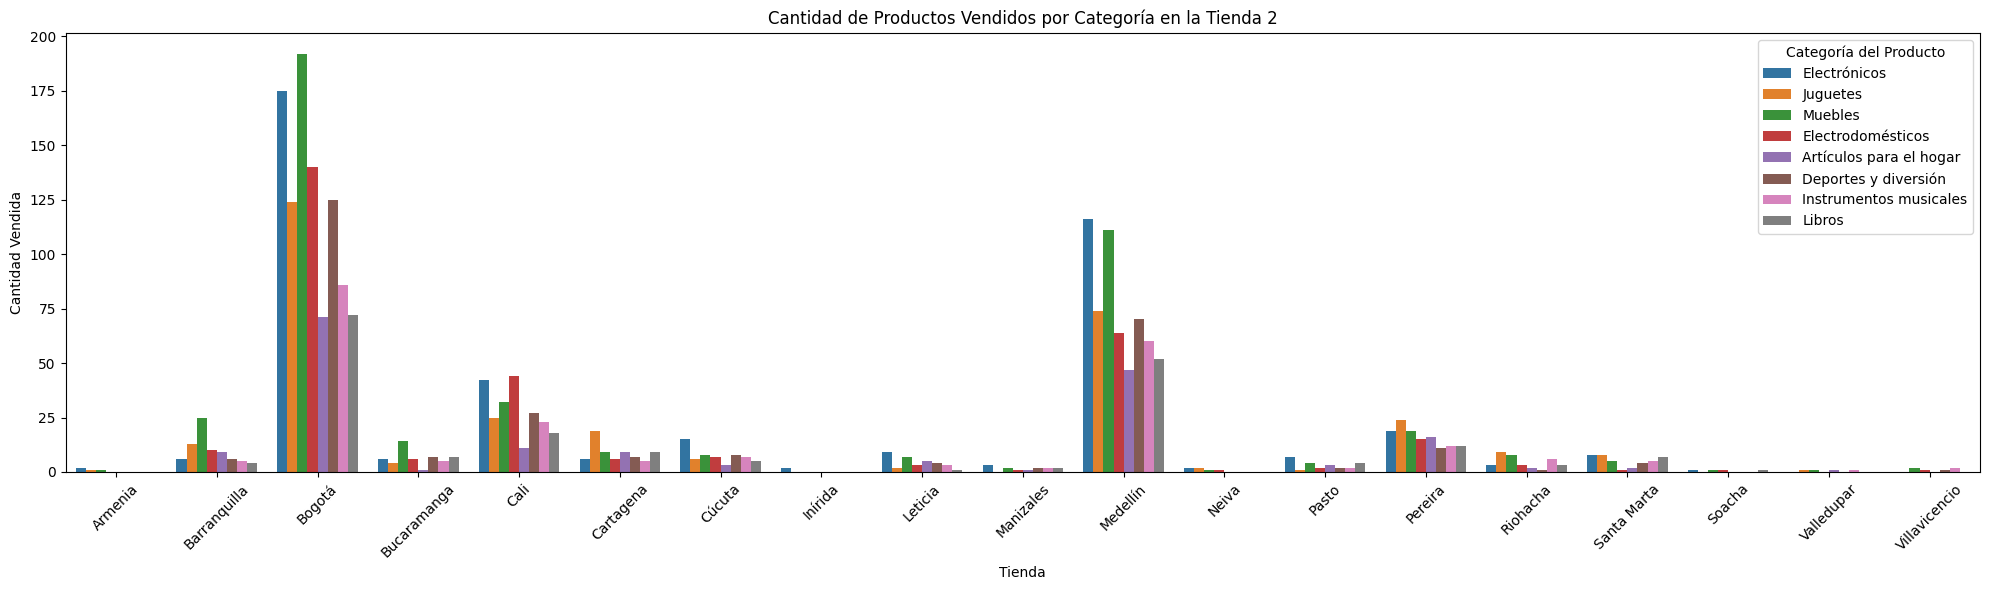

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# VENTAS POR CATEGORIA TIENDA 2
# Agrupar por 'Tienda' y 'Categoría del Producto' y contar las ventas
productos_por_categoria_tienda2 = tienda2.groupby(['Lugar de Compra', 'Categoría del Producto']).size().reset_index(name='Cantidad Vendida')

# Mostramos los primeros resultados para verificar
print(productos_por_categoria_tienda2.head())

# Ordenar las categorías por cantidad de ventas (de mayor a menor) dentro de cada tienda
productos_por_categoria_sorted2 = productos_por_categoria_tienda2.sort_values(by=['Lugar de Compra', 'Cantidad Vendida'], ascending=[True, False])

# Mostramos el DataFrame ordenado
print("")
print("Tabla Ordenada")
print(productos_por_categoria_sorted2.head())


plt.figure(figsize=(20, 6))
# Crear un gráfico de barras apiladas por categoría y tienda
sns.barplot(x='Lugar de Compra', y='Cantidad Vendida', hue='Categoría del Producto', data=productos_por_categoria_sorted2)

plt.title('Cantidad de Productos Vendidos por Categoría en la Tienda 2')
plt.xlabel('Tienda')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)
plt.legend(title='Categoría del Producto')

plt.tight_layout()
plt.show()

  Lugar de Compra   Categoría del Producto  Cantidad Vendida
0         Armenia  Artículos para el hogar                 2
1         Armenia             Electrónicos                 2
2         Armenia   Instrumentos musicales                 1
3         Armenia                 Juguetes                 2
4    Barranquilla  Artículos para el hogar                 6

Tabla Ordenada
   Lugar de Compra   Categoría del Producto  Cantidad Vendida
0          Armenia  Artículos para el hogar                 2
1          Armenia             Electrónicos                 2
3          Armenia                 Juguetes                 2
2          Armenia   Instrumentos musicales                 1
11    Barranquilla                  Muebles                15


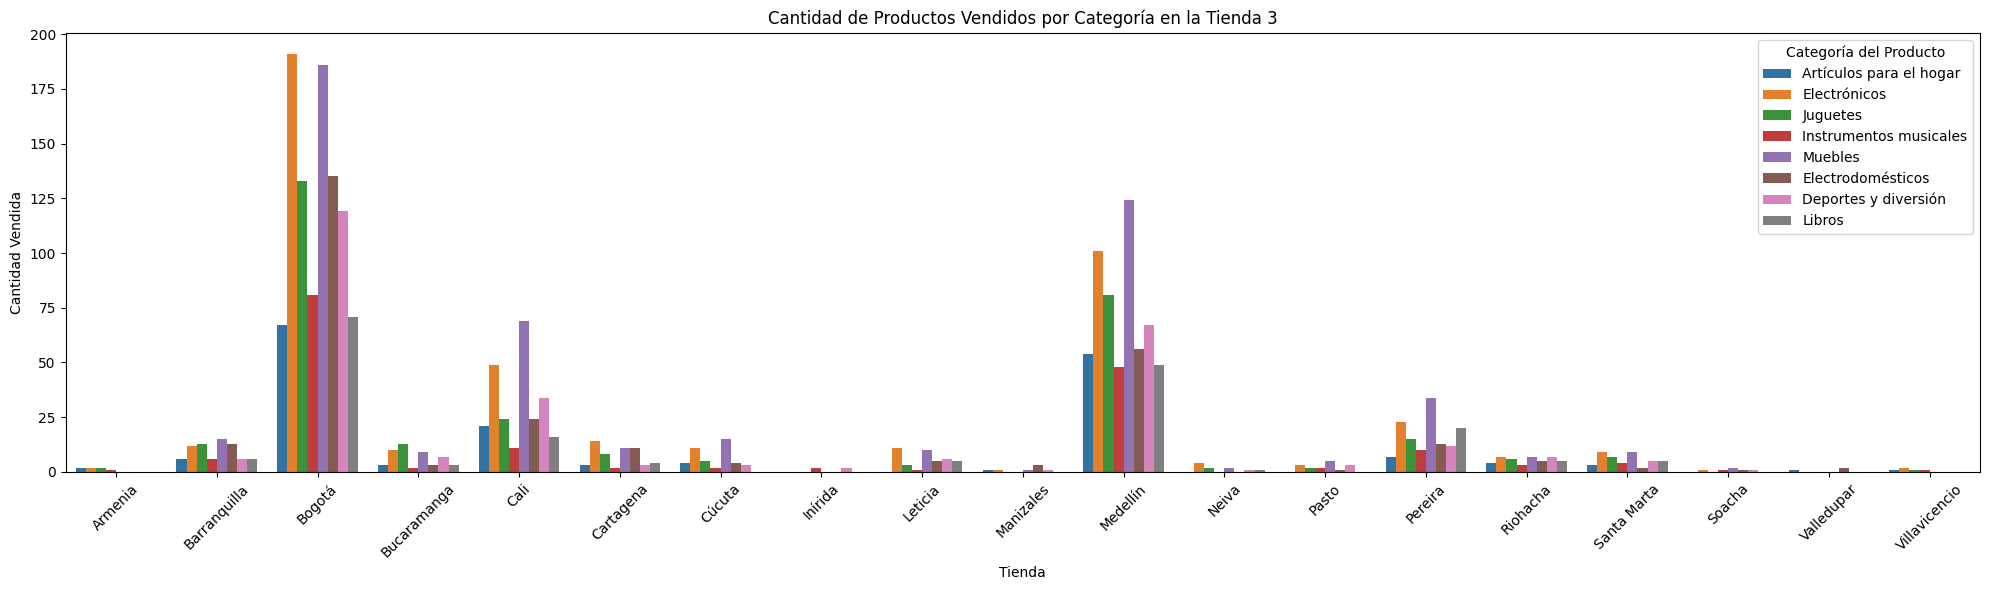

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# VENTAS POR CATEGORIA TIENDA 3
# Agrupar por 'Tienda' y 'Categoría del Producto' y contar las ventas
productos_por_categoria_tienda3 = tienda3.groupby(['Lugar de Compra', 'Categoría del Producto']).size().reset_index(name='Cantidad Vendida')

# Mostramos los primeros resultados para verificar
print(productos_por_categoria_tienda3.head())

# Ordenar las categorías por cantidad de ventas (de mayor a menor) dentro de cada tienda
productos_por_categoria_sorted3 = productos_por_categoria_tienda3.sort_values(by=['Lugar de Compra', 'Cantidad Vendida'], ascending=[True, False])

# Mostramos el DataFrame ordenado
print("")
print("Tabla Ordenada")
print(productos_por_categoria_sorted3.head())


plt.figure(figsize=(20, 6))
# Crear un gráfico de barras apiladas por categoría y tienda
sns.barplot(x='Lugar de Compra', y='Cantidad Vendida', hue='Categoría del Producto', data=productos_por_categoria_sorted3)

plt.title('Cantidad de Productos Vendidos por Categoría en la Tienda 3')
plt.xlabel('Tienda')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)
plt.legend(title='Categoría del Producto')

plt.tight_layout()
plt.show()

  Lugar de Compra   Categoría del Producto  Cantidad Vendida
0         Armenia             Electrónicos                 1
1         Armenia                 Juguetes                 1
2         Armenia                   Libros                 1
3    Barranquilla  Artículos para el hogar                 6
4    Barranquilla     Deportes y diversión                 9

Tabla Ordenada
   Lugar de Compra Categoría del Producto  Cantidad Vendida
0          Armenia           Electrónicos                 1
1          Armenia               Juguetes                 1
2          Armenia                 Libros                 1
10    Barranquilla                Muebles                18
6     Barranquilla           Electrónicos                15


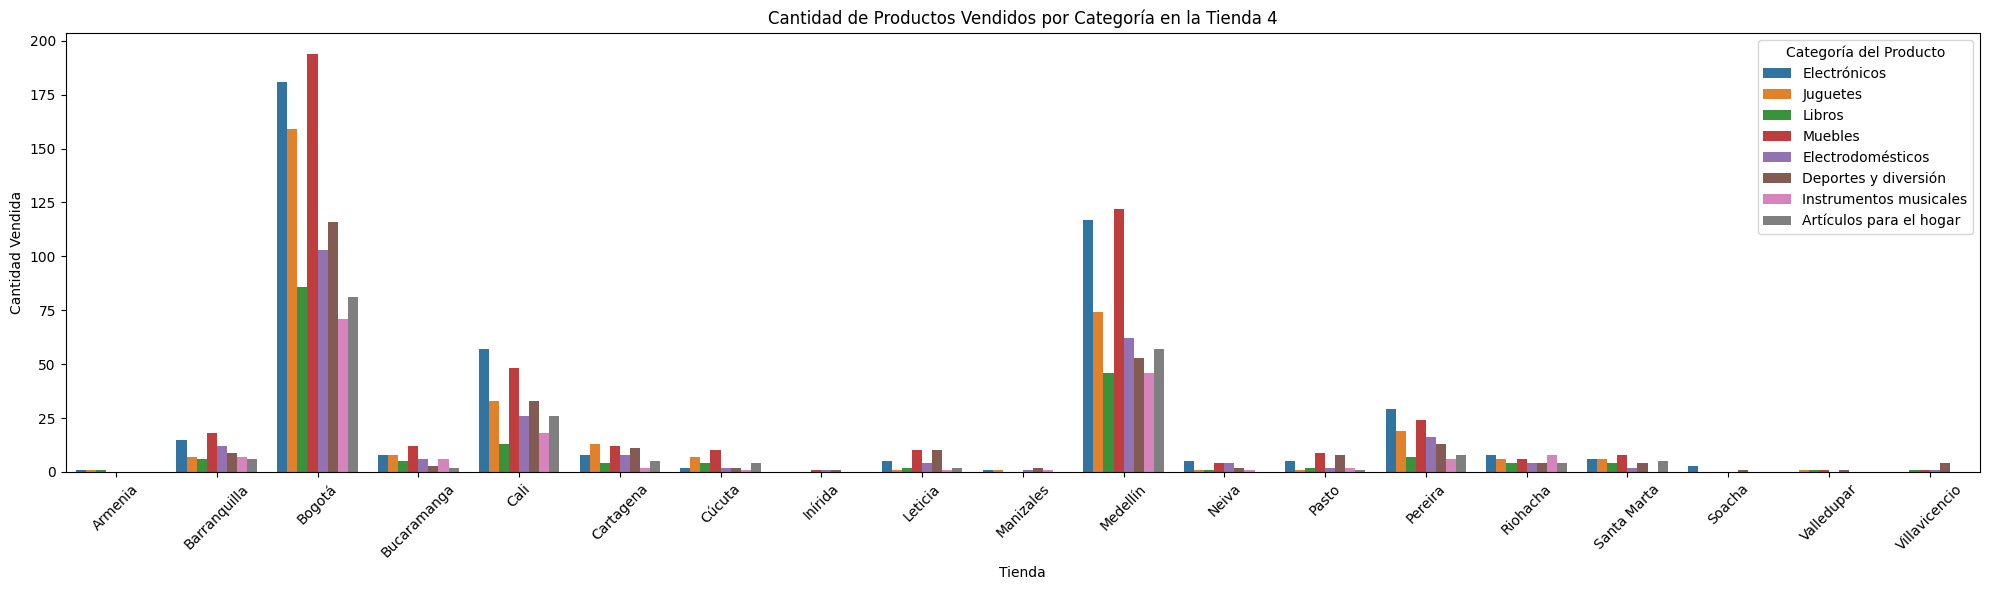

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# VENTAS POR CATEGORIA TIENDA 4
# Agrupar por 'Tienda' y 'Categoría del Producto' y contar las ventas
productos_por_categoria_tienda4 = tienda4.groupby(['Lugar de Compra', 'Categoría del Producto']).size().reset_index(name='Cantidad Vendida')

# Mostramos los primeros resultados para verificar
print(productos_por_categoria_tienda4.head())

# Ordenar las categorías por cantidad de ventas (de mayor a menor) dentro de cada tienda
productos_por_categoria_sorted4 = productos_por_categoria_tienda4.sort_values(by=['Lugar de Compra', 'Cantidad Vendida'], ascending=[True, False])

# Mostramos el DataFrame ordenado
print("")
print("Tabla Ordenada")
print(productos_por_categoria_sorted4.head())


plt.figure(figsize=(20, 6))
# Crear un gráfico de barras apiladas por categoría y tienda
sns.barplot(x='Lugar de Compra', y='Cantidad Vendida', hue='Categoría del Producto', data=productos_por_categoria_sorted4)

plt.title('Cantidad de Productos Vendidos por Categoría en la Tienda 4')
plt.xlabel('Tienda')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)
plt.legend(title='Categoría del Producto')

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [73]:
# Ingreso total por tienda
promedio_tienda_1 = tienda['Calificación'].mean()
promedio_tienda_2 = tienda2['Calificación'].mean()
promedio_tienda_3 = tienda3['Calificación'].mean()
promedio_tienda_4 = tienda4['Calificación'].mean()

# Mostramos los resultados
print(f'Promedio Tienda 1: {promedio_tienda_1}')
print(f'Promedio Tienda 2: {promedio_tienda_2}')
print(f'Promedio Tienda 3: {promedio_tienda_3}')
print(f'Promedio Tienda 4: {promedio_tienda_4}')


Promedio Tienda 1: 3.976685036032217
Promedio Tienda 2: 4.037303942348453
Promedio Tienda 3: 4.048325561678677
Promedio Tienda 4: 3.9957591178965224


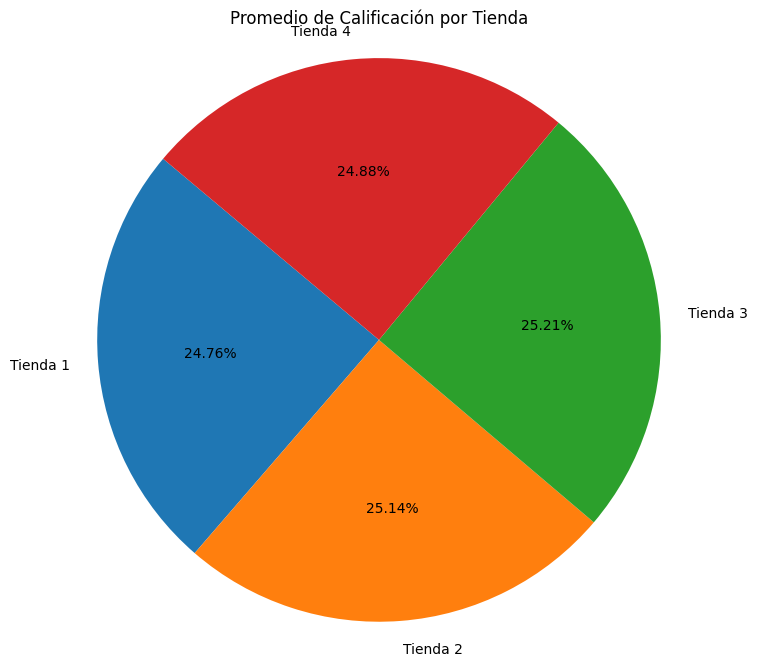

In [81]:
import matplotlib.pyplot as plt

lista_tienda = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
lista_promedio = [promedio_tienda_1, promedio_tienda_2, promedio_tienda_3, promedio_tienda_4]

plt.figure(figsize=(8, 8))
plt.pie(lista_promedio, labels=lista_tienda, autopct='%1.2f%%', startangle=140)
plt.title("Promedio de Calificación por Tienda")
plt.axis('equal')  # Asegura que el gráfico sea circular
plt.show()

# 4. Productos más y menos vendidos

In [82]:
# Contar cuántas veces se vendió cada producto
ventas_por_producto = dfppal['Producto'].value_counts().reset_index()
ventas_por_producto.columns = ['Producto', 'Cantidad Vendida']

# Producto más vendido
producto_mas_vendido = ventas_por_producto.iloc[0]
print(f"📈 Producto más vendido: {producto_mas_vendido['Producto']} - {producto_mas_vendido['Cantidad Vendida']} unidades")

# Producto menos vendido
producto_menos_vendido = ventas_por_producto.iloc[-1]
print(f"📉 Producto menos vendido: {producto_menos_vendido['Producto']} - {producto_menos_vendido['Cantidad Vendida']} unidad(es)")

📈 Producto más vendido: Mesa de noche - 210 unidades
📉 Producto menos vendido: Celular ABXY - 157 unidad(es)


Top 10 productos más vendidos:
                    Producto  Cantidad Vendida
0              Mesa de noche               210
1  Carrito de control remoto               206
2                 Microondas               206
3                    Batería               203
4                  Cama king               201
5           Secadora de ropa               200
6        Modelado predictivo               200
7               Set de ollas               200
8                   Cama box               199
9    Bloques de construcción               199


<ipython-input-89-fa82850f88e4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cantidad Vendida', y='Producto', data=top_10, palette='Blues')


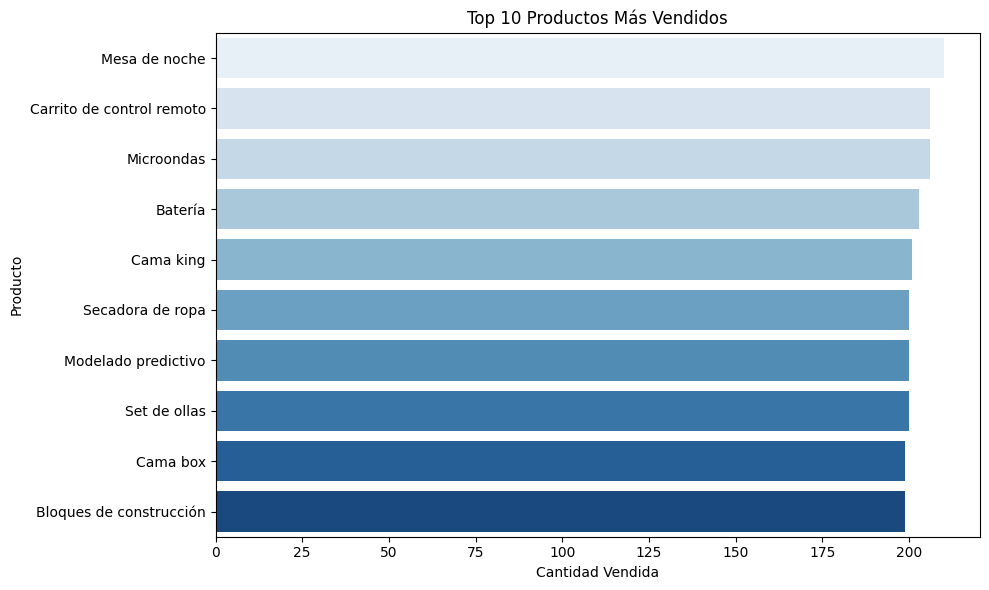

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

#TOP 10 DE PRODUCTOS MAS VENDIDOS
print("Top 10 productos más vendidos:")
print(ventas_por_producto.head(10))



top_10 = ventas_por_producto.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Cantidad Vendida', y='Producto', data=top_10, palette='Blues')
plt.title('Top 10 Productos Más Vendidos')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()

Top 10 productos más vendidos:
                       Producto  Cantidad Vendida
41              Olla de presión               172
42                   Smartwatch               172
43                 Set de vasos               169
44                       Sillón               168
45            Asistente virtual               167
46  Ciencia de datos con Python               166
47           Guitarra eléctrica               165
48                      Mochila               163
49    Auriculares con micrófono               158
50                 Celular ABXY               157


<ipython-input-90-ad9312b5a32f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cantidad Vendida', y='Producto', data=top_10, palette='Blues')


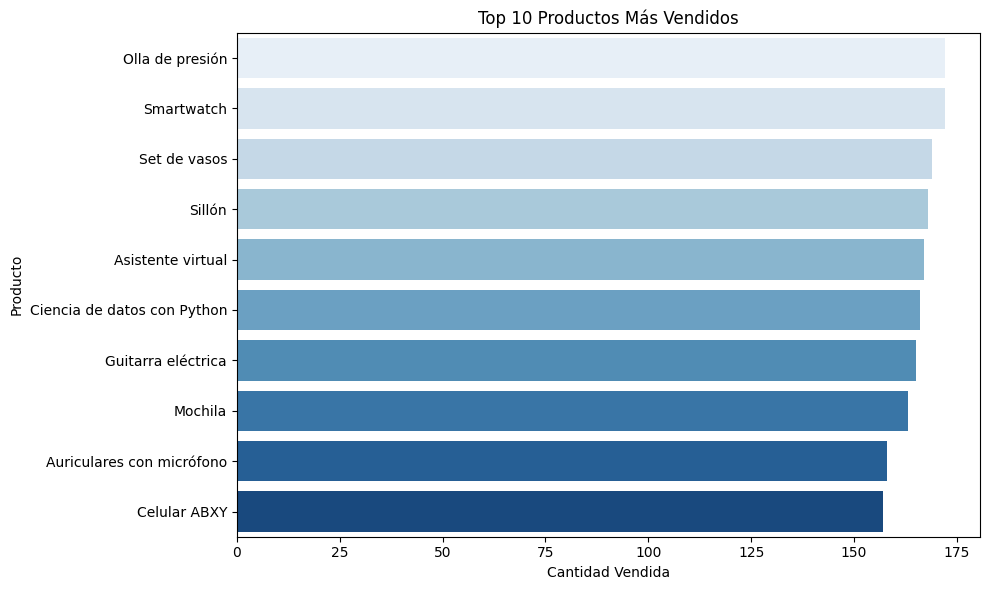

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

#TOP 10 DE PRODUCTOS MAS VENDIDOS
print("Top 10 productos más vendidos:")
print(ventas_por_producto.tail(10))



top_10 = ventas_por_producto.tail(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Cantidad Vendida', y='Producto', data=top_10, palette='Blues')
plt.title('Top 10 Productos Más Vendidos')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [91]:
# Ingreso total por tienda
promedio_costo_tienda_1 = tienda['Costo de envío'].mean()
promedio_costo_tienda_2 = tienda2['Costo de envío'].mean()
promedio_costo_tienda_3 = tienda3['Costo de envío'].mean()
promedio_costo_tienda_4 = tienda4['Costo de envío'].mean()

# Mostramos los resultados
print(f'Promedio Envío por Tienda 1: {promedio_costo_tienda_1}')
print(f'Promedio Envío por Tienda 2: {promedio_costo_tienda_2}')
print(f'Promedio Envío por Tienda 3: {promedio_costo_tienda_3}')
print(f'Promedio Envío por Tienda 4: {promedio_costo_tienda_4}')

Promedio Envío por Tienda 1: 26018.60958033065
Promedio Envío por Tienda 2: 25216.235693090293
Promedio Envío por Tienda 3: 24805.680373039424
Promedio Envío por Tienda 4: 23459.457167090754


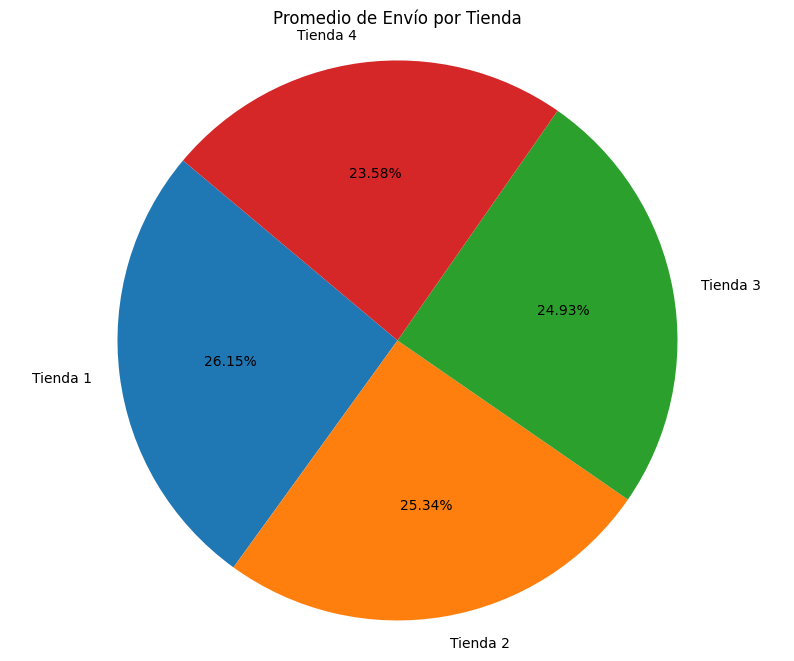

In [103]:
import matplotlib.pyplot as plt

lista_tienda = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
lista_promedio = [promedio_costo_tienda_1, promedio_costo_tienda_2, promedio_costo_tienda_3, promedio_costo_tienda_4]

plt.figure(figsize=(10, 8))
plt.pie(lista_promedio, labels=lista_tienda, autopct='%1.2f%%', startangle=140)
plt.title("Promedio de Envío por Tienda")
plt.axis('equal')  # Asegura que el gráfico sea circular
plt.show()